In [1]:
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt

In [143]:
with open('tasks/23.txt', 'r') as f:
    data = np.array([list(x) for x in f.read().split('\n')])

data_new = np.full((data.shape[0]+2, data.shape[1]+2), '#')
data_new[1:-1, 1:-1] = data
data = data_new

In [144]:
LAST_POINT = (data.shape[0] - 2, np.where(data[-2] == '.')[0][0])

In [145]:
START_POINT = (1, np.where(data[1] == '.')[0][0])

In [146]:
POSSIBLE_DIRS = ((0, 1), (0, -1), (1, 0), (-1, 0))

In [147]:
NOT_POSSIBLE_DIRS = {
    (0,1): '<',
    (0,-1): '>',
    (1, 0): '^',
    (-1, 0): 'v',
}

In [8]:
def count_longest_way(points):
    pos = points[-1]
    longest_way = 0
    best_points = []
    if pos == LAST_POINT:
#         print(len(points))
        return points
    if data[pos] == '#':
        return []
    if data[pos] == '>':
        if (pos[0], pos[1] + 1) not in points:
            return count_longest_way(points + [(pos[0], pos[1] + 1)])
    if data[pos] == '<':
        if (pos[0], pos[1] - 1) not in points:
            return count_longest_way(points + [(pos[0], pos[1] - 1)])
    if data[pos] == '^':
        if (pos[0] - 1, pos[1]) not in points:
            return count_longest_way(points + [(pos[0] - 1, pos[1])])
    if data[pos] == 'v':
        if (pos[0] + 1, pos[1]) not in points:
            return count_longest_way(points + [(pos[0] + 1, pos[1])])
    
    for p in POSSIBLE_DIRS:
        new_pos = pos[0] + p[0], pos[1] + p[1]
        if new_pos != '#' and new_pos not in points and data[new_pos] != NOT_POSSIBLE_DIRS[(new_pos[0] - pos[0], new_pos[1] - pos[1])]:
            new_points = count_longest_way(points + [new_pos])
            if len(new_points) > len(best_points):
                best_points = new_points
    return best_points
            

In [57]:
points = count_longest_way([START_POINT])

In [13]:
data_what = deepcopy(data)

In [14]:
for p in points:
    data_what[p] = 'O'

In [15]:
len(set(points)) - 1

94

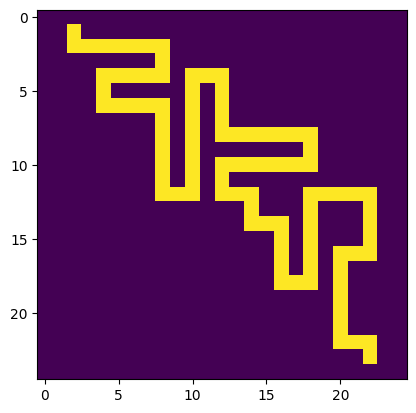

In [16]:
plt.imshow(data_what == 'O')

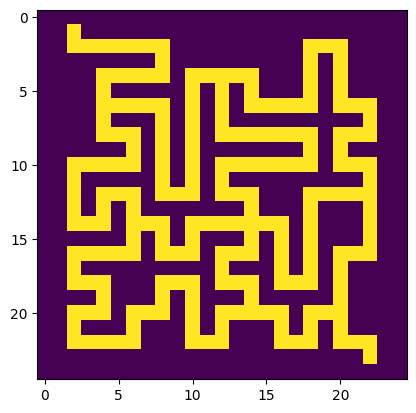

In [21]:
plt.imshow(data != '#')

In [148]:
nodes = []
for y in range(data.shape[0]):
    for x in range(data.shape[1]):
        pos_ways = 0
        if data[y, x] == '#':
            continue
        for d in POSSIBLE_DIRS:
            if data[y+d[0], x+d[1]] != '#':
                pos_ways += 1
        if pos_ways > 2:
            nodes.append((y, x))

In [149]:
nodes.append(START_POINT)
nodes.append(LAST_POINT)

In [150]:
def find_neighboring_crosses(cross, points, dis):
    closest_nodes = []
    pos = points[-1]
    for p in POSSIBLE_DIRS:
        new_pos = pos[0] + p[0], pos[1] + p[1]
        if data[new_pos] != '#' and new_pos not in points:
            if new_pos in nodes:
                return [(new_pos, dis + 1)]
#             print(cross, new_pos)
            closest_nodes.extend((find_neighboring_crosses(cross, points + [new_pos], dis + 1)))
    return closest_nodes

In [152]:
graph = {}

In [153]:
for node in nodes:
    graph[node] = find_neighboring_crosses(node, [node], 0)

In [154]:
graph

{(12, 80): [((14, 110), 236), ((20, 64), 212), ((36, 86), 98)],
 (14, 6): [((20, 36), 284), ((36, 12), 136), ((1, 2), 57)],
 (14, 110): [((38, 132), 438), ((12, 80), 236), ((30, 108), 62)],
 (20, 36): [((20, 64), 280), ((14, 6), 284), ((30, 40), 42)],
 (20, 64): [((12, 80), 212), ((20, 36), 280), ((38, 60), 90)],
 (30, 40): [((38, 60), 76), ((36, 12), 206), ((68, 44), 254), ((20, 36), 42)],
 (30, 108): [((38, 132), 136),
  ((36, 86), 132),
  ((56, 106), 136),
  ((14, 110), 62)],
 (36, 12): [((30, 40), 206), ((62, 16), 254), ((14, 6), 136)],
 (36, 86): [((30, 108), 132), ((38, 60), 168), ((54, 86), 94), ((12, 80), 98)],
 (38, 60): [((36, 86), 168), ((30, 40), 76), ((66, 56), 176), ((20, 64), 90)],
 (38, 132): [((30, 108), 136), ((56, 124), 186), ((14, 110), 438)],
 (54, 86): [((56, 106), 70), ((66, 56), 174), ((86, 80), 158), ((36, 86), 94)],
 (56, 106): [((56, 124), 62),
  ((54, 86), 70),
  ((76, 108), 114),
  ((30, 108), 136)],
 (56, 124): [((56, 106), 62), ((78, 124), 214), ((38, 132

In [155]:
def find_longes_way(path):
    max_path = 0
    if path[-1][0] == LAST_POINT:
#         print(path)
        return sum([x[-1] for x in path])
    for node in graph[path[-1][0]]:
        if node[0] not in (p[0] for p in path):
            max_path = max(max_path, find_longes_way(path + [node]))
    return max_path

In [156]:
find_longes_way([(START_POINT, 0)])

6658